In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from datetime import datetime
import itertools
import gc
import pickle
import math

%matplotlib inline

In [ ]:
# 데이터 불러오기

sales = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

# 2. EDA

### 1) 월별 총 판매량/ 판매금액

월별 총 판매량
- 전체적으로 월별 판매개수가 꾸준히 하락함  
- 엄청 높게 치솟는 두 개 점은 연말(13년 12월, 14년 12월)임

In [ ]:
plt.rc('font', family = 'Malgun Gothic') # window
plt.rc('axes', unicode_minus = False)

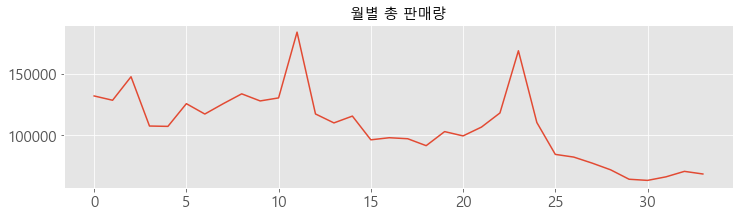

In [ ]:
# 월별 총 판매개수
group1 = sales.groupby(by=['date_block_num']).sum()
group1 = group1.reset_index()
plt.figure(figsize=(12,3))
plt.plot(group1.date_block_num,  group1.item_cnt_day)
plt.title('월별 총 판매량')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

월별 총 판매금액

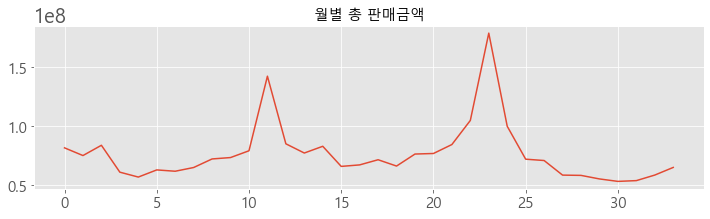

In [ ]:
# 월별 총 판매금액
time_ns = sales[['item_price','date_block_num']]
time_ns = time_ns.groupby(by=['date_block_num']).sum()
plt.figure(figsize=(12,3))
plt.plot(time_ns.index, time_ns.values)
plt.title('월별 총 판매금액')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

### 2) 월/연도별 거래량

In [ ]:
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [ ]:
train_group = train.groupby(['year', 'month']).mean().loc[:, 'item_price':'item_cnt_day']

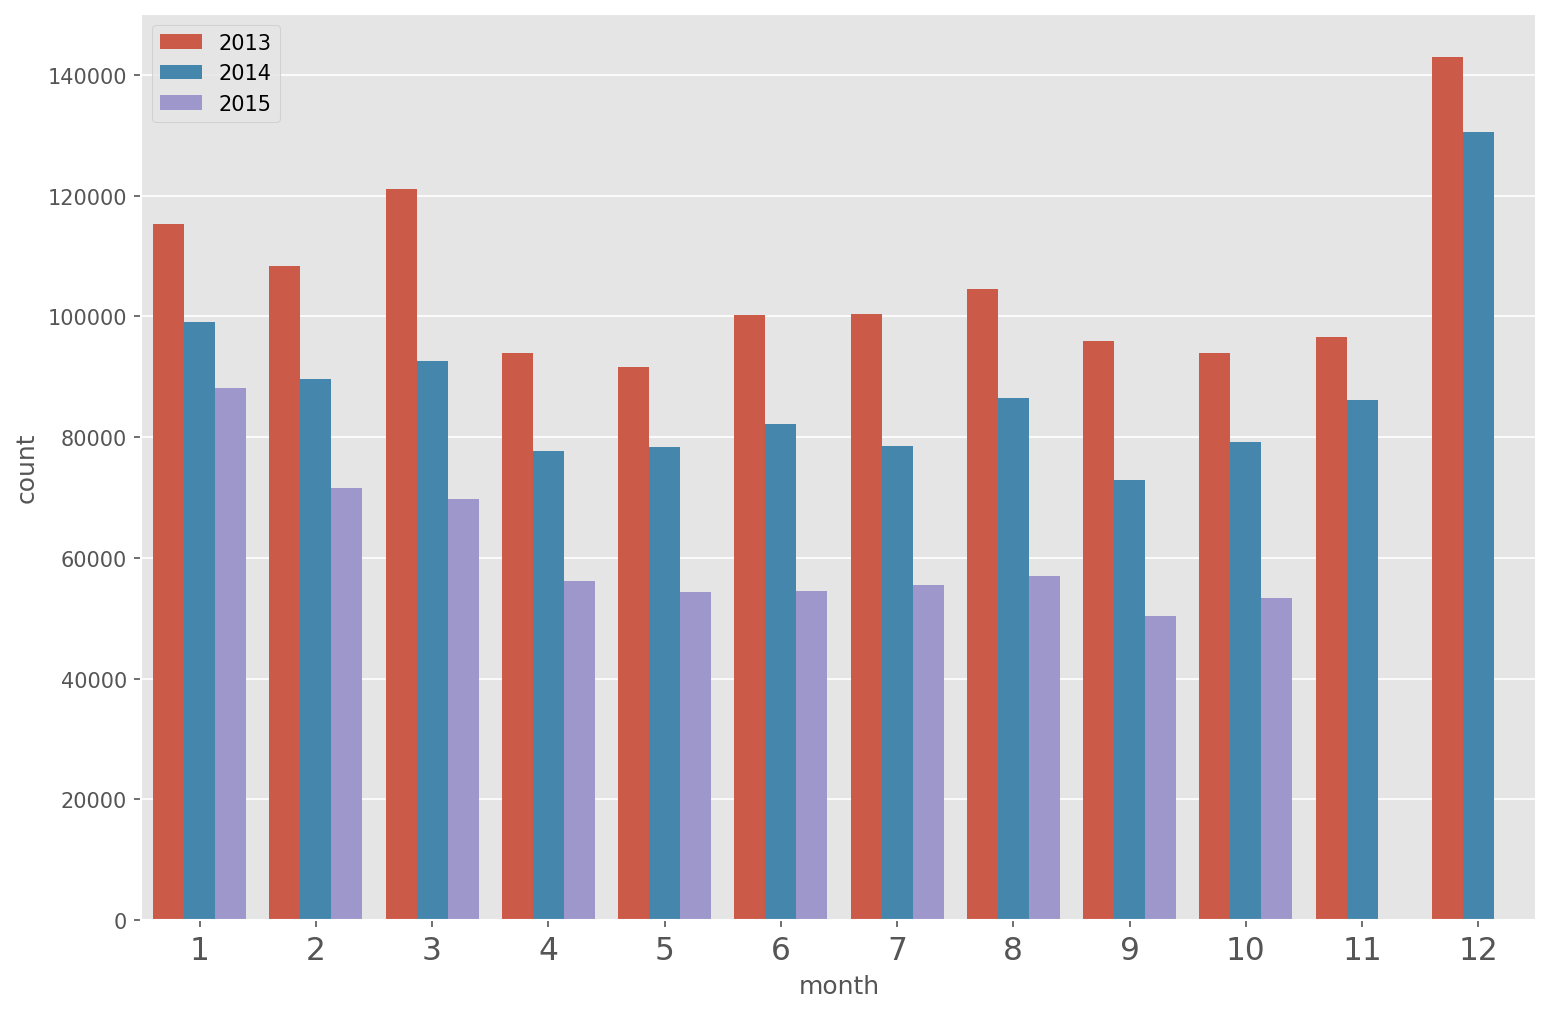

In [ ]:
# 각 연도 월별 비교한 제품 판매

plt.figure(figsize=(12,8),dpi=150)
sns.countplot(x='month',data=train,hue='year')
plt.legend(loc='best')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()

# 2015년으로 갈수록 제품 판매수가 감소하는 것을 확인할 수 있음

### 3) 월별 거래된 shops 수, 월별 거래된 items 수

In [ ]:
# 각 월 블록에서 매출 데이터에 거래가 있는 고유 상점 및 품목 수
shop_count = sales.groupby('date_block_num')['shop_id'].nunique()
item_count = sales.groupby('date_block_num')['item_id'].nunique()

sales.groupby('date_block_num').nunique()
#sales.groupby('date_block_num')['shop_id'].nunique() # 월별 고유 상점수
#sales.groupby('date_block_num')['item_id'].nunique()  # 월별 고유 아이템수

sales['item_id'].nunique() #item 21802개
items['item_id'].nunique() #item 22170개
#sales['shop_id'].nunique() #shop 60개
shops['shop_id'].nunique() #shop 60개

60

sales에 있는 item_id랑 items에 있는 item_id의 수가 다름

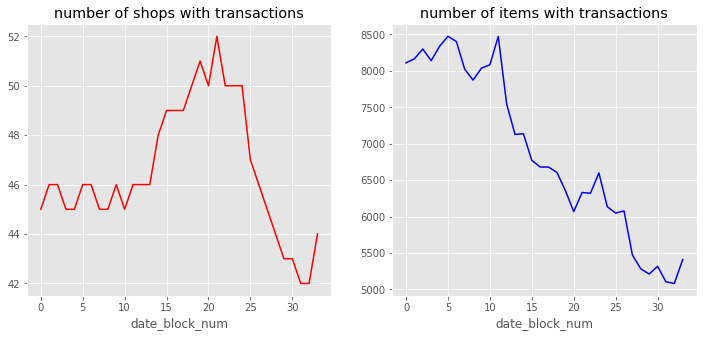

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
shop_count.plot(ax = ax[0], color = 'red')
item_count.plot(ax = ax[1], color = 'blue')
ax[0].set_title('number of shops with transactions') #거래가 있는 상점수
ax[1].set_title('number of items with transactions') #거래된 아이템수
plt.show()

연말을 제외하고는 월별 거래수와 월별 거래된 아이템수 모두 하락세
거래처들의 수는 2년차부터는 느는 듯 했으나 2말부터 훅훅 떨어짐  
그리고 거래처수가 60개로 나오는데 차트를 보면 매달 모든 가게에서 거래되는 게 아니고 물건도 많이 못미침

### 4) 상점별 일별, 월별 item 판매개수

상점별 일일 item 판매개수

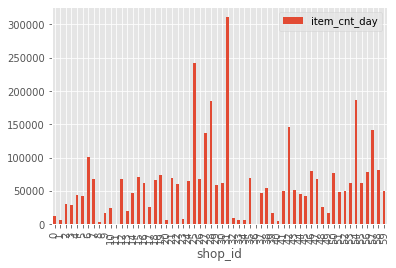

In [ ]:
shop_ns = sales[['shop_id','item_cnt_day']]
shop_ns.set_index(['shop_id'])
shop_ns = shop_ns.groupby(by=['shop_id']).sum()
shop_ns.plot(kind = 'bar')
plt.show()

상점별 월 item 판매개수 

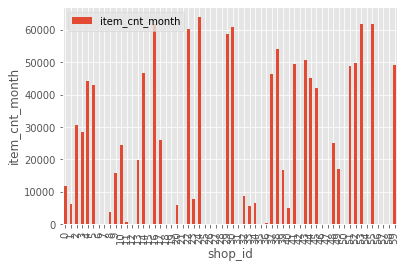

In [ ]:
# 상점별 월 item 판매개수
shop_ns = matrix[['shop_id','item_cnt_month']]
shop_ns.set_index(['shop_id'])
shop_ns = shop_ns.groupby(by=['shop_id']).sum()
shop_ns.plot(kind = 'bar')
plt.xlabel('shop_id')
plt.ylabel('item_cnt_month')
plt.show()

### 5) 가격별 item 하루 판매개수

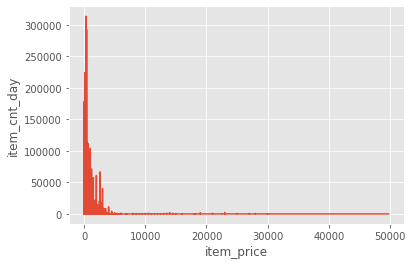

In [ ]:
price_ns = sales[['item_price','item_cnt_day']]
price_ns = price_ns.groupby(by=['item_price']).sum()
plt.plot(price_ns.index, price_ns.values)
plt.xlabel('item_price')
plt.ylabel('item_cnt_day')
plt.show()

### 6) 상품별 판매량 / 가격

In [ ]:
sales1= pd.merge(sales, items, on=['item_id'], how='left')
sales1= pd.merge(sales1, item_categories, on=['item_category_id'], how='left')
sales1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_category_id,type_id
0,2013-01-02,0,59,22154,999.00,1.0,999.00,37,11
1,2013-01-03,0,25,2552,899.00,1.0,899.00,58,13
2,2013-01-06,0,25,2554,1709.05,1.0,1709.05,58,13
3,2013-01-15,0,25,2555,1099.00,1.0,1099.00,56,13
4,2013-01-10,0,25,2564,349.00,1.0,349.00,59,13


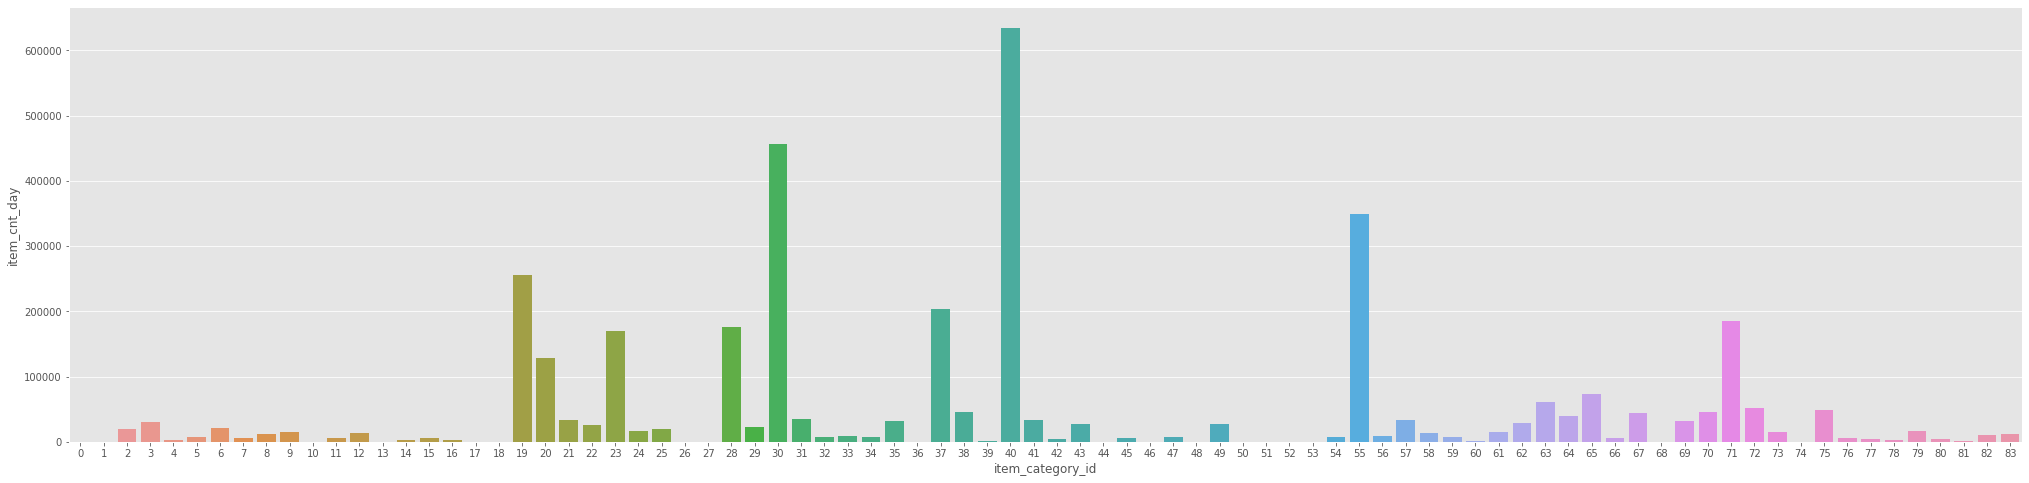

In [ ]:
# 카테고리 품목별 판매량 
Category_sum=sales1.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
fig, axes = plt.subplots(1,1,figsize = (35,8))
sns.barplot(x="item_category_id",y="item_cnt_day", data=Category_sum)
plt.show()

In [ ]:
item_rank=pd.DataFrame(train['item_name'].value_counts().sort_values(ascending=False))
item_rank.reset_index(inplace=True)
item_rank.columns = ['item_name', 'counts']
item_rank.head()

,item_name,counts
0,Фирменный пакет майка 1С Интерес белый (34*42)...,31333
1,Playstation Store пополнение бумажника: Карта ...,9404
2,Прием денежных средств для 1С-Онлайн,9067
3,"Diablo III [PC, Jewel, русская версия]",7470
4,Kaspersky Internet Security Multi-Device Russi...,6850


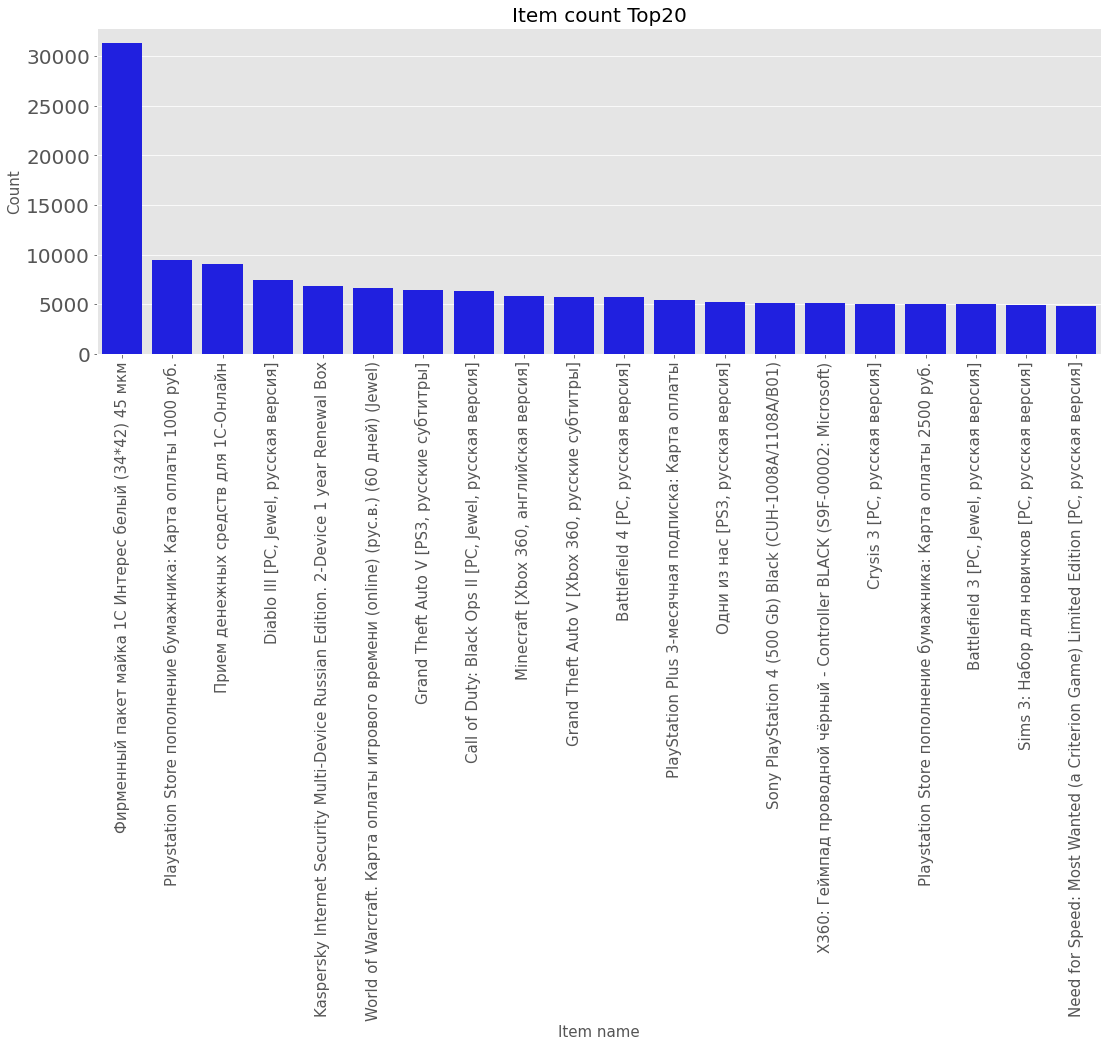

In [ ]:
# 상품 별 판매량 top20
fig, axes = plt.subplots(1,1,figsize = (18,6))
plt.style.use('ggplot')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

ax=sns.barplot(x='item_name',y='counts', data=item_rank[0:20], color='b')
ax.set_title('Item count Top20', fontsize=20)
ax.set_xlabel('Item name', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [ ]:
# 상품별 가격

In [ ]:
price_rank = train[['item_name','item_category_name','item_price']].groupby(['item_name','item_category_name']).max()
price_rank.sort_values('item_price',ascending=False).head()

,,item_price
item_name,item_category_name,
UserGate Proxy & Firewall 6.X с модулем фильтрации сайтов Entensys URL Filtering до 200 сессий (Academic/Social),Программы - Для дома и офиса,49782.0
"Комплект ""Microsoft Xbox One 1TB Limited Edition Halo 5 + ""Halo 5. Limited Edition"" [KF6-00012]",Игровые консоли - XBOX ONE,42990.0
UserGate Proxy & Firewall 6.X до 100 сессий,Программы - Для дома и офиса,42000.0
Лицензия 1С-Битрикс: Управление сайтом - Эксперт,Программы - Для дома и офиса,40900.0
Photoshop 13 Windows Russian BOX,Программы - Для дома и офиса,36990.0


Most expensive items:
1. Remote Control Software
2. Shipping cost
3. Lord of the Ring(DVD)

In [ ]:
price_rank.sort_values('item_price',ascending=True).head()

,,item_price
item_name,item_category_name,
Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм,"Подарки - Сумки, Альбомы, Коврики д/мыши",5.0
Элемент питания КОСМОС LR03 2*BL,Элементы питания,7.0
"Monday Night Combat [PC, Цифровая версия]",Игры PC - Цифра,10.0
Карта города Жуковский,Подарки - Сувениры,11.0
"Щелкунчик и Крысиный король [PC, Jewel]",Игры PC - Стандартные издания,14.0


Cheapest items:
1. Corporate package
2. Battery
3. Monday Night Combat(PC Game)

### 7) 카테고리별 매출 / 판매량 / Top 20

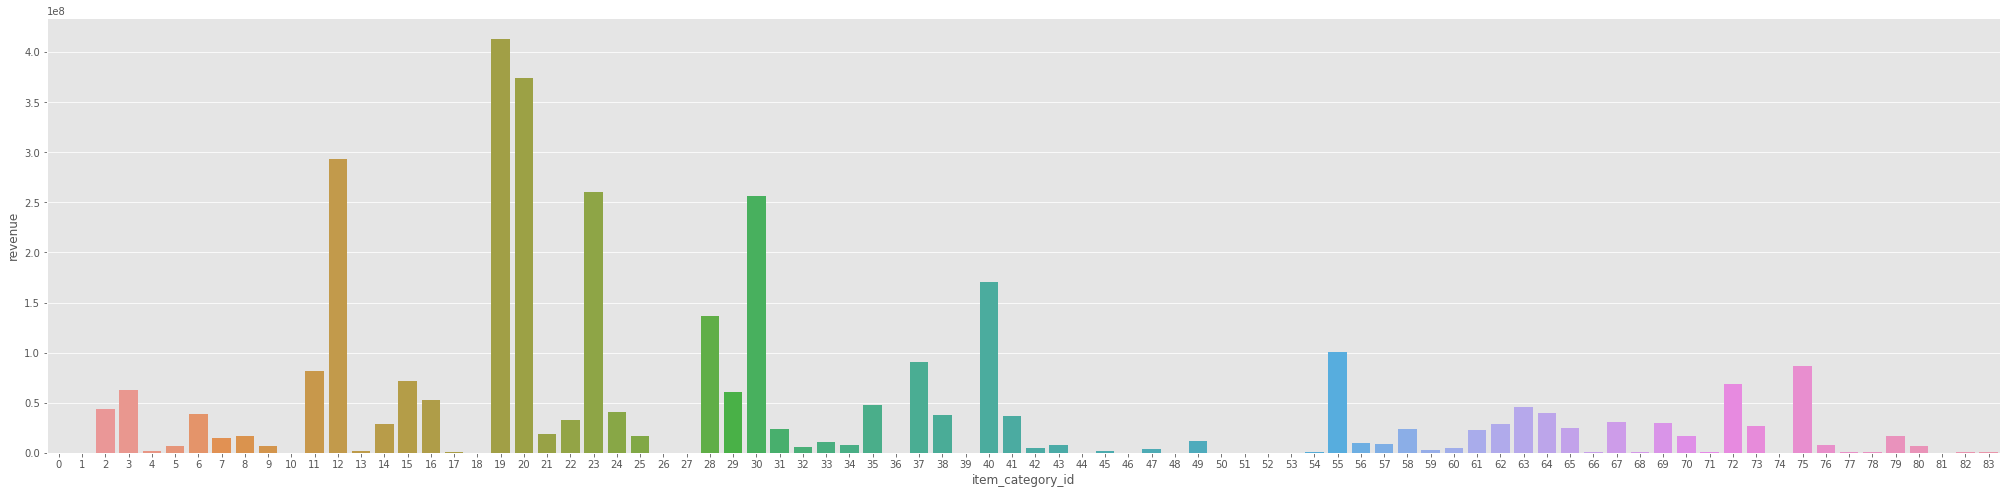

In [ ]:
# 카테고리별 총 매출
Category_sum=sales1.groupby(['item_category_id'], as_index=False)['revenue'].sum()
fig, axes = plt.subplots(1,1,figsize = (35,8))
sns.barplot(x="item_category_id",y="revenue", data=Category_sum)
plt.show()

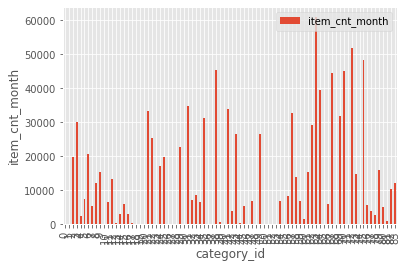

In [ ]:
# 카테고리별 판매개수
category_ns = matrix[['item_category_id','item_cnt_month']]
category_ns.set_index(['item_category_id'])
category_ns = category_ns.groupby(by=['item_category_id']).sum()
category_ns.plot(kind = 'bar')
plt.xlabel('category_id')
plt.ylabel('item_cnt_month')
plt.show()

In [ ]:
item_cat_rank=pd.DataFrame(train['item_category_name'].value_counts().sort_values(ascending=False))
item_cat_rank.reset_index(inplace=True)
item_cat_rank.columns = ['item_categories', 'counts']
item_cat_rank.head()

,item_categories,counts
0,Кино - DVD,563937
1,Игры PC - Стандартные издания,350786
2,Музыка - CD локального производства,339127
3,Игры - PS3,207371
4,Кино - Blu-Ray,191931


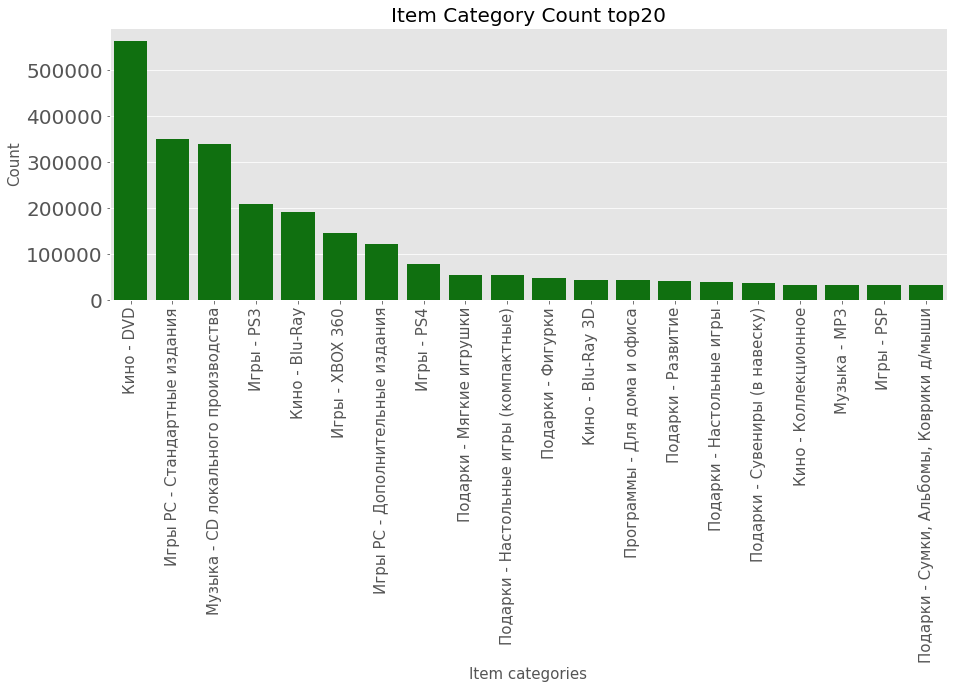

In [ ]:
fig, axes = plt.subplots(1,1,figsize = (15,5))
plt.style.use('ggplot')

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

ax=sns.barplot(x='item_categories',y='counts', data=item_cat_rank[0:20], color='g')
ax.set_title('Item Category Count top20', fontsize=20)
ax.set_xlabel('Item categories', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

- TV-game 관련 소프트웨어와 영화DVD가 잘 팔리는 것을 확인
- Top5 item categories:
1. Cinema - DVD
2. PC Games - Standard Editions
3. Music - Local Production CD
4. Games - PS3
5. Cinema - Blu-ray

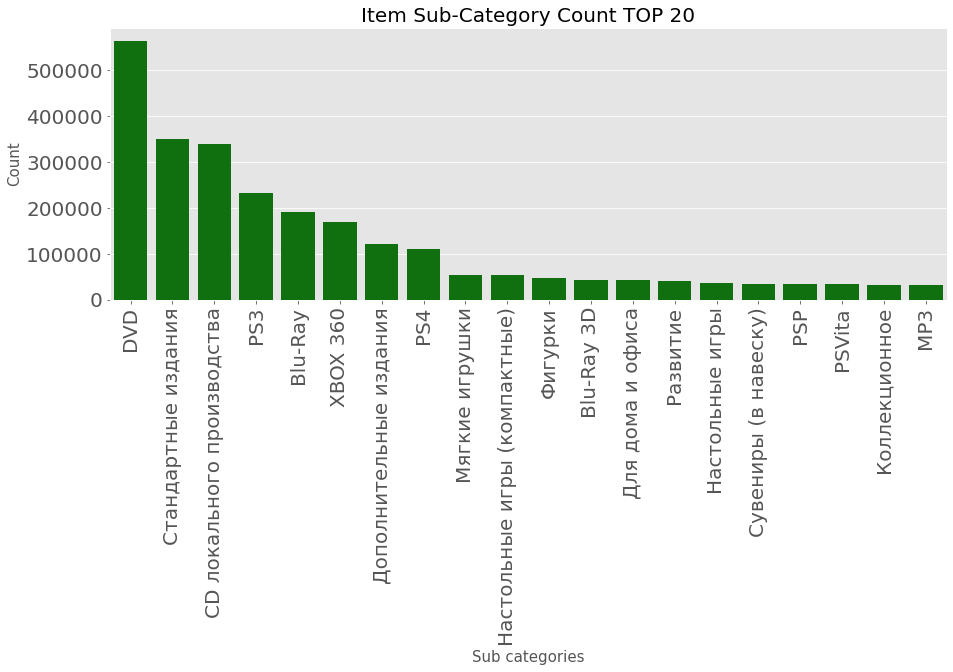

In [ ]:
item_s_cat_rank=pd.DataFrame(train['sub'].value_counts())
item_s_cat_rank.reset_index(inplace=True)
item_s_cat_rank.columns = ['item_subcategories', 'counts']

fig, axes = plt.subplots(1,1,figsize = (15,5))

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

ax=sns.barplot(x='item_subcategories',y='counts', data=item_s_cat_rank[0:20], color='g')
ax.set_title('Item Sub-Category Count TOP 20', fontsize=20)
ax.set_xlabel('Sub categories', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.show()

### 8) 도시 - 지도 시각화
- 상점은 주로 서부지역에 몰려있다.
- 모스크바에서 판매량이 가장 많다.

In [ ]:
sas = pd.read_csv('sales_train.csv')
sas.date = pd.to_datetime(sas.date,format = '%d.%m.%Y',errors = 'raise')
shs = pd.read_csv('shops.csv')
shs['city'] = shs['shop_name'].str.split(' ').map(lambda x: x[0])
shs.loc[shs.city == '!Якутск', 'city'] = 'Якутск'
city_encoder = LabelEncoder()
shs['city_id'] = city_encoder.fit_transform(shs['city'])

### 지도에 크기로 표시
sig = pd.DataFrame({'Якутск':[62.0333,129.7],'Адыгея':[44.8218,39.1827],'Балашиха':[55.7981904,37.9679867],'Волжский':[48.8176494,44.7707294],'Вологда':[59.21666670,39.90000000],'Воронеж':[51.6754966,39.2088823],'Жуковский':[55.5974912,38.1132562],'Казань':[55.8304307,49.0660806],'Калуга':[54.5518584,36.2850973],'Коломна':[55.08333330,38.78333330],'Красноярск':[56.0152834,92.8932476],'Курск':[51.73733,36.18735],'Москва':[55.751244,37.618423],'Мытищи':[55.9198471,37.7654985],'Н.Новгород':[56.2965039,43.9360589],'Новосибирск':[55.0083526,82.9357327],'Омск':[54.99244,73.36859],'РостовНаДону':[47.2357137,39.701505],'СПб':[59.9342802,30.3350986],'Самара':[54.95423,73.380011],'СергиевПосад':[56.3,38.1333],'Сургут':[61.2559503,73.3845471],'Томск':[56.5010397,84.9924506],'Тюмень':[57.1612975,65.5250172],'Уфа':[54.75,55.966667],'Химки':[55.8940553,37.4439487],'Чехов':[55.14266029946535,37.4545328],'Якутск':[62.0354523,129.6754745],'Ярославль':[57.6260744,39.8844708]}).T.reset_index()
sig.columns = ['city','lat','lng']
fmap = sas.merge(shs,on = 'shop_id').groupby('city').sum().merge(sig,on = 'city')
import folium
import random
Mt_Hanla =[55,55]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 2)
for i in range(len(fmap)):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
    name = fmap.iloc[i,0]    # 공식명칭
    count = fmap.iloc[i,5]
    size = int(count/10000)
    long = fmap.iloc[i,7]
    lat = fmap.iloc[i,8]
    folium.CircleMarker((long,lat), radius = size, color=color, popup=name).add_to(map_jeju)
map_jeju

----------------------------------------------------------

## CODEBOOK

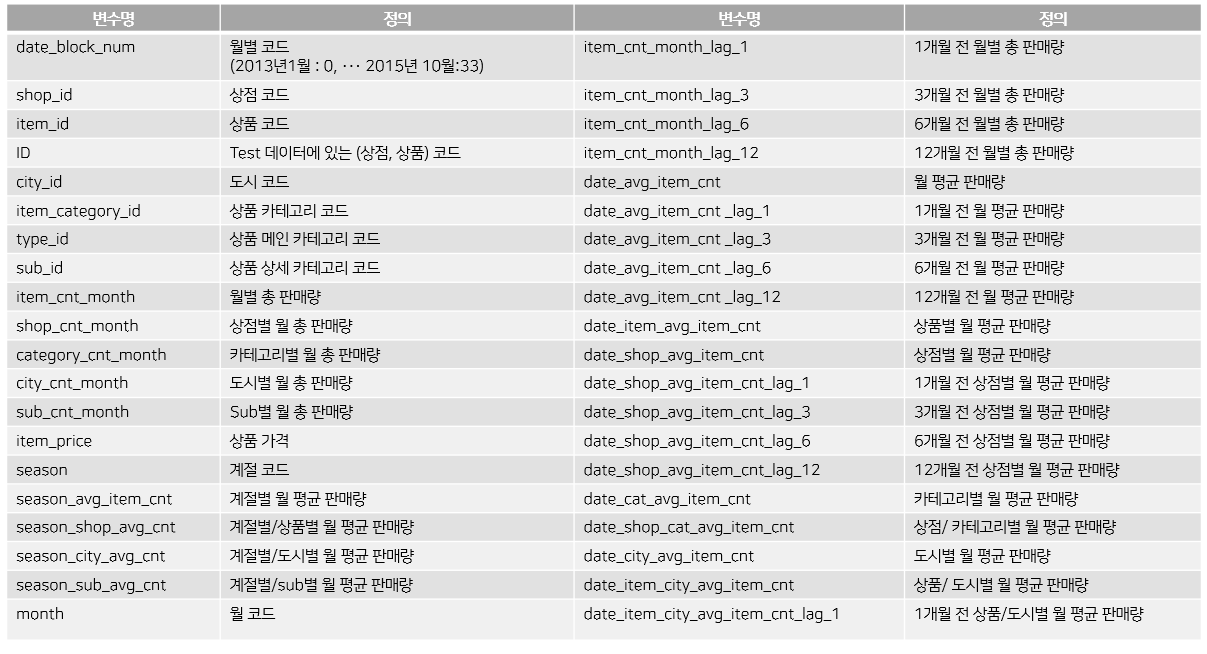